# Content Based Algorithm System

limitation: they are not align with your or mine playlist

- track_id: The Spotify ID for the track
- artists: The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- album_name: The album name in which the track appears
- track_name: Name of the track
- popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- duration_ms: The track length in milliseconds
- explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- loudness: The overall loudness of a track in decibels (dB)
mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4. 
- track_genre: The genre in which the track belongs

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
import pickle

In [118]:
spotify_data= pd.read_csv('Datasets\dataset.csv',index_col=0)
spotify_data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [119]:
spotify_data.tail(20)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113980,64BdW5aHuB3C0QP3qjBJVi,I AM THEY,I AM THEY,Amen,41,238146,False,0.516,0.634,7,-4.850,1,0.0339,0.030000,0.000002,0.0813,0.0921,76.994,4,world-music
113981,1pBc7W7UQacUeQ6kBVlN9f,Planetshakers,Greater (Live),Heaven Is My Home - Live,39,289179,False,0.498,0.957,1,-5.807,0,0.1620,0.005270,0.000000,0.4770,0.2050,128.028,4,world-music
113982,39So2wAM6l3XKWDf5XjiIz,Planetshakers,All For Love,Come Holy Spirit,36,352453,False,0.437,0.638,4,-6.483,0,0.0308,0.211000,0.000428,0.1380,0.1590,148.000,4,world-music
113983,6X6wIzuxsh7GVNMPz1xTNa,Hillsong Worship,No Other Name,Depths,37,377697,False,0.363,0.462,7,-8.232,1,0.0284,0.008870,0.000009,0.7060,0.0687,80.003,4,world-music
113984,0PjyOURxQ6wiHaBYXf53G2,Tenth Avenue North,The Light Meets The Dark,Healing Begins,44,237280,False,0.541,0.583,2,-7.047,1,0.0285,0.014200,0.000000,0.1020,0.2760,96.008,4,world-music
113985,5y8ARSg47Yx52xvQQAlS35,Mosaic MSC,HUMAN (Deluxe) [Live],Fountain (I Am Good) - Live,22,318874,False,0.438,0.577,5,-8.285,1,0.0357,0.020600,0.000013,0.2530,0.1140,139.983,4,world-music
113986,2ZYEpnio0Z6EfJWy2JAf53,Dulces Sueños,#20 Sueños Vividos - Música Intrumental Suave ...,Sueños Vividos,21,335999,False,0.198,0.257,8,-17.361,1,0.0415,0.968000,0.949000,0.1100,0.0381,89.494,4,world-music
113987,4jDhzTYkEG5GloIWwVeVkc,Planetshakers,Revival (Live),All My Life - Live,40,246306,False,0.470,0.938,11,-4.722,0,0.1050,0.000529,0.000000,0.2510,0.4530,128.002,4,world-music
113988,6PM55W7WiUmHVPdUebJP55,Planetshakers,Greater (Live),Stay (You Are Good) - Live,38,462397,False,0.296,0.762,2,-5.696,1,0.0548,0.072400,0.000003,0.3740,0.1460,139.051,4,world-music
113989,0XEgJiDryoDd2gIJhVXghd,Bryan & Katie Torwalt;Brock Human,I've Got Good News (Live) [Deluxe],Hallelujah On My Knees - Live,22,380344,False,0.495,0.281,2,-12.070,1,0.0316,0.392000,0.000000,0.6620,0.2060,127.731,4,world-music


In [120]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [121]:
spotify_data.shape

(114000, 20)

In [122]:
spotify_data.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [123]:
spotify_data.dropna(inplace=True)

In [124]:
# contain ; in the artist name
spotify_data[spotify_data['artists'].str.contains(';')]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.1200,76.332,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,-8.822,1,0.0355,0.85700,0.000003,0.0913,0.0765,141.284,3,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,0,-8.700,1,0.0369,0.29400,0.000000,0.1510,0.6690,130.088,4,acoustic
14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet;Deepend,Hold On (Remix),Hold On - Remix,56,188133,False,0.755,0.780,2,-6.084,1,0.0327,0.12400,0.000028,0.1210,0.3870,120.004,4,acoustic
16,6xKeQgzfjixSUld14qUezm,Andrew Foy;Renee Foy,ily (i love you baby),ily (i love you baby),56,129750,False,0.706,0.112,2,-18.098,1,0.0391,0.82700,0.000004,0.1250,0.4140,110.154,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113966,42bdU7oDyRvyRXaKbUrtfu,Bethel Music;Bethany Wohrle,Victory (Live),Victory Is Yours - Live,44,333080,False,0.418,0.786,9,-5.257,1,0.0471,0.01050,0.000000,0.3420,0.0656,139.920,4,world-music
113967,1eZYPovTvmxk3QlVD2VpCX,Bethel Music;Brian Johnson,We Will Not Be Shaken (Live),We Will Not Be Shaken - Live,46,332604,False,0.392,0.668,9,-7.342,1,0.0296,0.00356,0.000560,0.5880,0.1150,148.013,4,world-music
113969,7mD7yAQm4GcifSnWqJdZHi,Bethel Music;Molly Skaggs,Victory (Live),Ain’t No Grave - Live,47,493293,False,0.370,0.831,4,-4.484,1,0.0442,0.01290,0.000122,0.1090,0.1850,148.008,4,world-music
113975,2yAo8cJDVoMjBMS5MgrO8P,Hillsong Worship;Hillsong Young & Free,OPEN HEAVEN / River Wild,This Is Living,38,214647,False,0.611,0.857,0,-6.248,0,0.0384,0.00182,0.000000,0.3260,0.4640,128.001,4,world-music


In [125]:
float_cols = spotify_data.dtypes[spotify_data.dtypes == 'float64'].index.values

In [126]:
ohe_cols = 'popularity'

In [127]:
# simple function one hot encoding feature
def ohe_prep(df,column,new_name):
    """ 
    Create new column with one hot encoding values
    Parameters:
        df: dataframe
        column: column name
        new_name: new column name
    Returns:
        tf_df: new dataframe with one hot encoding column
    """
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + '_' + str(i) for i in feature_names]
    tf_df.reset_index(drop=True, inplace=True)
    return tf_df

In [128]:
# function to build entire feature set
#  import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

def create_feature_set(df,float_cols):

    # tfidf genre list
    tfidf = TfidfVectorizer()
    tfidf_genre = tfidf.fit_transform(df['track_genre'])
    tfidf_genre = pd.DataFrame(tfidf_genre.toarray())
    tfidf_genre.columns = ['genre_' + str(i) for i in tfidf_genre.columns]
    tfidf_genre.reset_index(drop=True, inplace=True)

    # one hot encoding popularity
    ohe_popularity = ohe_prep(df,'popularity','popularity')

    # one hot encoding explicit
    ohe_explicit = ohe_prep(df,'explicit','explicit')

    # scale float columns
    scaler = MinMaxScaler()
    scaled_floats = scaler.fit_transform(df[float_cols].reset_index(drop=True))
    scaled_floats = pd.DataFrame(scaled_floats,columns=float_cols) * 0.2

    # combine all features
    feature_set = pd.concat([tfidf_genre,scaled_floats,ohe_popularity,ohe_explicit],axis=1)

    feature_set['track_id'] = df['track_id'].values

    return feature_set

In [129]:
complete_feature_set = create_feature_set(spotify_data,float_cols)

In [130]:
complete_feature_set.head()

,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,...,popularity_94,popularity_95,popularity_96,popularity_97,popularity_98,popularity_99,popularity_100,explicit_False,explicit_True,track_id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,5SuOikwiRyPMVoIQDJUgSV
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,4qPNDBW1i3p13qLCt0Ki3A
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1iJBSr7s7jYXzM8EGcbK5b
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6lfxq3CG4xtTiEg7opyCyx
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,5vjLSffimiIP26QG5WcN2K


# Connect to spotify


In [131]:
import sys
client_id = 'a'
client_secret = 's'

In [132]:
scope = 'user-library-read playlist-read-private playlist-read-collaborative user-top-read user-read-recently-played  user-read-playback-state  user-read-private'
if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print("Usage: %s username" % (sys.argv[0],))
    sys.exit()

In [133]:
# !pip install spotipy

In [134]:

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

import warnings
warnings.filterwarnings("ignore")
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [135]:
token = util.prompt_for_user_token(scope,client_id=client_id,client_secret=client_secret,redirect_uri='http://localhost:8888/callback/')
sp = spotipy.Spotify(auth=token)

In [136]:
#gather playlist names and images. 
#images aren't going to be used until I start building a UI
id_name = {}
list_photo = {}
for i in sp.current_user_playlists()['items']:
    id_name[i['name']] = i['id']


In [137]:
# get playlist id from url
def create_necessary_outputs(playlist_name,id_dic, df):
    """ 
    Pull songs from a specific playlist.

    Parameters: 
        playlist_name (str): name of the playlist you'd like to pull from the spotify API
        id_dic (dic): dictionary that maps playlist_name to playlist_id
        df (pandas dataframe): spotify datafram
        
    Returns: 
        playlist: all songs in the playlist THAT ARE AVAILABLE IN THE KAGGLE DATASET
    """
    
    #generate playlist dataframe
    playlist = pd.DataFrame()
    playlist_name = playlist_name

    for ix, i in enumerate(sp.playlist(id_dic[playlist_name])['tracks']['items']):
        #print(i['track']['artists'][0]['name'])
        playlist.loc[ix, 'artist'] = i['track']['artists'][0]['name']
        playlist.loc[ix, 'name'] = i['track']['name']
        playlist.loc[ix, 'id'] = i['track']['id'] # ['uri'].split(':')[2]
        playlist.loc[ix, 'url'] = i['track']['album']['images'][1]['url']
        playlist.loc[ix, 'date_added'] = i['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['id'].isin(df['track_id'].values)].sort_values('date_added',ascending = False)
    
    return playlist

In [138]:
id_name


{'My Playlist #9': '2RlgwCNZhbKLAYOHgNn1Ig',
 'Shree Hanuman Chalisa': '3qjRV3PgcOeXJztLMCeWoL',
 'DK': '4ZnpycwlcFVlGTyhTlddIy',
 'Aarti songs': '4EPKWI5ajqzxJe6nWxJTfe',
 'English songs': '709YWTHNWReeb70MdTBTtM',
 'Sad_SK': '0XRK7nCKcOaA7iU5g8T9dn',
 'MySongs#12': '2NQa3ZRpCuQRIFk1EIF2Hh',
 'Wake up Bro': '17HZ6AG9FX1e6fU4PbqjsK',
 'Killer': '2GhRfZktlowb3CVvvIw06t'}

In [139]:
playlist_EDM = create_necessary_outputs('MySongs#12', id_name,spotify_data)


In [140]:
playlist_EDM


,artist,name,id,url,date_added
56,Arijit Singh,Kabhi Jo Baadal Barse,3MVPReTwLNOBFb6KjiIRNM,https://i.scdn.co/image/ab67616d00001e0234bb47...,2022-03-31 16:28:54+00:00
53,Vishal Dadlani,Jee Le Zaraa,2r32XiAWtZbT3eLUvf4pag,https://i.scdn.co/image/ab67616d00001e02e8acd7...,2022-03-31 15:48:23+00:00
52,Himesh Reshammiya,Hookah Bar,4AoQVhME8Ko6LNm4lV2wwQ,https://i.scdn.co/image/ab67616d00001e0233f89b...,2022-03-31 15:48:08+00:00
51,Sohail Sen,Saiyaara,1ocYa8PoVd5e2vPn0xHJcA,https://i.scdn.co/image/ab67616d00001e02c52900...,2022-03-31 15:47:52+00:00
48,Atif Aslam,Piya O Re Piya,5a11x5PUFvJEadMRqtNtTr,https://i.scdn.co/image/ab67616d00001e02118668...,2022-03-31 15:46:00+00:00
46,Pritam,Ala Barfi,6yipH0hUeAf4YPK40k1oIY,https://i.scdn.co/image/ab67616d00001e02352f44...,2022-03-29 14:34:51+00:00
44,Pritam,Aashiyan,7ttlemwytO21npSmLKqTBg,https://i.scdn.co/image/ab67616d00001e02352f44...,2022-03-29 14:34:30+00:00
43,Pritam,Kyon,1sYC1fG7s4p0pTykrJqmgW,https://i.scdn.co/image/ab67616d00001e02352f44...,2022-03-29 14:34:21+00:00
42,Shankar-Ehsaan-Loy,Slow Motion Angreza,0JX7Es2j556FwtR6YqMKzP,https://i.scdn.co/image/ab67616d00001e02fd2df0...,2022-03-24 16:47:45+00:00
37,Pritam,Tum Mile,1EjxJHY9A6LMOlvyZdwDly,https://i.scdn.co/image/ab67616d00001e02bcb8ec...,2022-03-22 14:29:26+00:00


In [155]:
from skimage import io
import matplotlib.pyplot as plt

def visualize_songs(df):
    """ 
    Visualize cover art of the songs in the inputted dataframe

    Parameters: 
        df (pandas dataframe): Playlist Dataframe
    """
    
    temp = df['url'].values
    plt.figure(figsize=(15,int(0.625 * len(temp))))
    columns = 5
    for i, url in enumerate(temp):
        plt.subplot(int(len(temp) / columns + 1), columns, i + 1)
        # io.close(url)
        image = io.imread(url)
        plt.imshow(image)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(df['name'].values[i], fontsize = 12)
        plt.tight_layout(h_pad=0.4, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\LENOVO\\AppData\\Local\\Temp\\tmp1c4z6lzi'

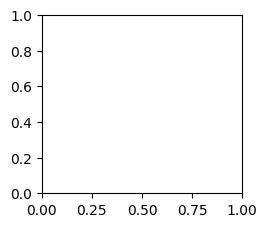

In [156]:
visualize_songs(playlist_EDM)